Week 2: Analysis of NBA 2k 2020 Dataset. Data taken from here: https://www.kaggle.com/datasets/isaienkov/nba2k20-player-dataset?select=nba2k-full.csv
The objective of this notebook is work on the fundamentals EDA process of taking a dataset, investigating its status and how the data is portrayed, then drawing conclusions and sharing a story with it.

List of questions Asked:
* does colleges produce better athletes?
* native usa vs none native usa
* distribution of salary, position, draft class
* correspond rating to different factors

In [107]:
#import list
#data manipulation and set-up
import pandas as pd
import numpy as np
from datetime import date
import re
#plotting libraries
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt


In [221]:
path = "C:/Users/saketm1/Desktop/ML_Projects/Week_2_nba2k/nba2k-full.csv"
og_df = pd.read_csv(path)
df = og_df[og_df.version == 'NBA2k20'] #doing an analysis on NBA2k20 players means isolating data from only that game s

In [222]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 428
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
 14  version      429 non-null    object
dtypes: int64(2), object(13)
memory usage: 53.6+ KB


In [224]:
df['b_day'] = pd.to_datetime(df['b_day'])
def age(bday):
    today = date.today()
    return today.year - bday.year - ((today.month, today.day) < (bday.month, bday.day))

df['age'] = df['b_day'].apply(lambda row: age(row))

C:\Users\saketm1\AppData\Local\Temp/ipykernel_24672/3427239793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['b_day'] = pd.to_datetime(df['b_day'])
C:\Users\saketm1\AppData\Local\Temp/ipykernel_24672/3427239793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['b_day'].apply(lambda row: age(row))


In [225]:
#cleaning up the salary and jersey columns to remove the extra symbols
def drop_non_numeric(value):
    return re.sub('[^0-9]', '', value)
df.salary = df.salary.apply(lambda x: drop_non_numeric(x)).astype(int)
df.jersey = df.jersey.apply(lambda x: drop_non_numeric(x)).astype(int)

C:\Users\saketm1\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [226]:
#getting the weight only as lbs
def convert_weight(weight):
    weight = weight.split("/")[0]
    weight = weight.split(" ")[0]
    weight = int(weight)
    return weight
df.weight = df.weight.apply(lambda x: convert_weight(x)).astype(int)

In [227]:
#getting the height into inches
def convert_height(height):
    height = height.split("/")[0]
    feet, inches = height.split("-")
    total_inches = int(feet) * 12 + int(inches)
    return total_inches
df.height = df.height.apply(lambda x: convert_height(x)).astype(int)

In [228]:
df.dtypes #check to make sure data types are right

full_name              object
rating                  int64
jersey                  int32
team                   object
position               object
b_day          datetime64[ns]
height                  int32
weight                  int32
salary                  int32
country                object
draft_year              int64
draft_round            object
draft_peak             object
college                object
version                object
age                     int64
dtype: object

In [189]:
df.head() #checking the data to see that it worked

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,81,250,37436858,USA,2003,1,1,NaN,NBA2k20,38
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,79,225,32742000,USA,2011,1,15,San Diego State,NBA2k20,31
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,1994-12-06,83,242,25842697,Greece,2013,1,15,NaN,NBA2k20,28
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,82,230,37199000,USA,2007,1,2,Texas,NBA2k20,34
4,James Harden,96,13,Houston Rockets,G,1989-08-26,77,220,38199000,USA,2009,1,3,Arizona State,NBA2k20,33


Cool, now the data looks a lot better and a lot more readable after cleaning it up. The next step is to look into any weird data or any outliers and see whether that is an issue with the transformations, data collection, or true 2k anomalies.

In [229]:
df.isnull().sum() #checking any potential nulls that came up from the data manipulations

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
version         0
age             0
dtype: int64

In [230]:
df[df.team.isnull()]

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
33,DeMarcus Cousins,86,0,NaN,C,1990-08-13,82,270,3500000,USA,2010,1,5,Kentucky,NBA2k20,32
168,Michael Beasley,76,0,NaN,F,1989-01-09,82,235,3500000,USA,2008,1,2,Kansas State,NBA2k20,34
177,Gerald Green,76,0,NaN,F-G,1986-01-26,78,192,2564753,USA,2005,1,18,NaN,NBA2k20,36
198,Isaiah Thomas,76,0,NaN,G,1989-02-07,69,185,2320044,USA,2011,2,60,Washington,NBA2k20,33
203,Pau Gasol,75,0,NaN,C,1980-07-06,85,250,5538540,Spain,2001,1,3,NaN,NBA2k20,42
237,Allonzo Trier,75,0,NaN,G-F,1996-01-17,76,200,3551100,USA,2018,Undrafted,Undrafted,Arizona,NBA2k20,26
264,Chandler Parsons,74,0,NaN,F,1988-10-25,81,200,25102512,USA,2011,2,38,Florida,NBA2k20,34
266,Ivan Rabb,74,0,NaN,F-C,1997-02-04,82,220,451326,USA,2017,2,35,California,NBA2k20,25
283,Allen Crabbe,73,0,NaN,G-F,1992-04-09,77,197,17818456,USA,2013,2,31,California,NBA2k20,30
294,CJ Miles,73,0,NaN,G-F,1987-03-18,78,232,8730158,USA,2005,2,34,NaN,NBA2k20,35


In [231]:
df[df.college.isnull()]

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,81,250,37436858,USA,2003,1,1,NaN,NBA2k20,38
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,1994-12-06,83,242,25842697,Greece,2013,1,15,NaN,NBA2k20,28
11,Nikola Jokic,90,15,Denver Nuggets,C,1995-02-19,84,253,27504630,Serbia,2014,2,41,NaN,NBA2k20,27
16,Rudy Gobert,88,27,Utah Jazz,C,1992-06-26,85,238,25258427,France,2013,1,27,NaN,NBA2k20,30
20,Luka Doncic,87,77,Dallas Mavericks,G-F,1999-02-28,79,227,7683360,Slovenia,2018,1,3,NaN,NBA2k20,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Darius Bazley,70,7,Oklahoma City Thunder,F,2000-06-12,80,200,2284800,USA,2019,1,23,NaN,NBA2k20,22
405,Thanasis Antetokounmpo,70,43,Milwaukee Bucks,F,1992-07-18,78,215,1445697,Greece,2014,2,51,NaN,NBA2k20,30
421,Isaac Bonga,68,17,Washington Wizards,G,1999-11-08,80,200,1416852,Germany,2018,2,39,NaN,NBA2k20,23
422,Isaiah Hartenstein,68,0,NaN,F-C,1998-05-05,84,250,1416852,Germany,2017,2,43,NaN,NBA2k20,24


We see that there are only two columns now that have nulls: team and college. The reason for these two having nulls is because those without a team (free agents) have their teams set to null, and those that went straight into the draft from high school/from another country dont have any college associated with them. These are logical nulls and are still relevant to the data which is why I chose to still include these points. 

Now we are going to check out some points and data distribution on these undrafted players. Do they deserve to be undrafted?

In [233]:
df[df.team.isnull()].describe(include='all',datetime_is_numeric=True)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
count,23,23.00000,23.000000,0,23,23,23.000000,23.000000,2.300000e+01,23,23.000000,23,23,19,23,23.000000
unique,23,NaN,NaN,0,6,NaN,NaN,NaN,NaN,3,NaN,3,14,16,1,NaN
top,DeMarcus Cousins,NaN,NaN,NaN,F-C,NaN,NaN,NaN,NaN,USA,NaN,1,Undrafted,California,NBA2k20,NaN
freq,1,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,21,NaN,8,7,3,23,NaN
mean,NaN,72.73913,0.130435,NaN,NaN,1992-08-03 19:49:33.913043456,79.260870,219.347826,4.199227e+06,NaN,2013.391304,NaN,NaN,NaN,NaN,29.913043
min,NaN,68.00000,0.000000,NaN,NaN,1980-07-06 00:00:00,69.000000,170.000000,5.000000e+04,NaN,2001.000000,NaN,NaN,NaN,NaN,24.000000
25%,NaN,70.00000,0.000000,NaN,NaN,1989-01-23 12:00:00,77.000000,198.500000,4.769085e+05,NaN,2011.000000,NaN,NaN,NaN,NaN,26.000000
50%,NaN,72.00000,0.000000,NaN,NaN,1993-05-07 00:00:00,80.000000,220.000000,1.620564e+06,NaN,2016.000000,NaN,NaN,NaN,NaN,29.000000
75%,NaN,74.50000,0.000000,NaN,NaN,1996-09-08 12:00:00,82.000000,240.000000,3.525550e+06,NaN,2017.000000,NaN,NaN,NaN,NaN,33.500000
max,NaN,86.00000,3.000000,NaN,NaN,1998-08-18 00:00:00,85.000000,270.000000,2.510251e+07,NaN,2019.000000,NaN,NaN,NaN,NaN,42.000000


In [232]:
df[df.team.notnull()].describe(include='all',datetime_is_numeric=True)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
count,406,406.000000,406.000000,406,406,406,406.000000,406.000000,4.060000e+02,406,406.000000,406,406,344,406,406.000000
unique,406,NaN,NaN,30,7,NaN,NaN,NaN,NaN,39,NaN,3,57,107,1,NaN
top,LeBron James,NaN,NaN,Milwaukee Bucks,G,NaN,NaN,NaN,NaN,USA,NaN,1,Undrafted,Kentucky,NBA2k20,NaN
freq,1,NaN,NaN,17,167,NaN,NaN,NaN,NaN,302,NaN,249,60,25,406,NaN
mean,NaN,76.578818,15.448276,NaN,NaN,1993-09-14 23:35:10.344827648,78.507389,214.039409,8.775424e+06,NaN,2014.133005,NaN,NaN,NaN,NaN,28.805419
min,NaN,67.000000,0.000000,NaN,NaN,1981-03-17 00:00:00,70.000000,170.000000,7.956800e+04,NaN,2001.000000,NaN,NaN,NaN,NaN,22.000000
25%,NaN,73.000000,3.000000,NaN,NaN,1990-12-15 06:00:00,76.000000,197.000000,2.074020e+06,NaN,2012.000000,NaN,NaN,NaN,NaN,26.000000
50%,NaN,75.000000,11.000000,NaN,NaN,1994-02-23 12:00:00,78.500000,212.500000,4.767000e+06,NaN,2015.000000,NaN,NaN,NaN,NaN,28.000000
75%,NaN,79.000000,22.000000,NaN,NaN,1996-12-25 06:00:00,81.000000,230.000000,1.249385e+07,NaN,2017.000000,NaN,NaN,NaN,NaN,32.000000
max,NaN,97.000000,99.000000,NaN,NaN,2000-12-23 00:00:00,88.000000,290.000000,4.023176e+07,NaN,2019.000000,NaN,NaN,NaN,NaN,41.000000


A few interesting things we can see out the this clump of information. 
1) The average player is about 5-6% better than those undrafted. We can attest to this by using rating as an indication for perfomance capabilities. 
2) The most sought after role is the Guard position, with it taking up a little over 40% of the positions of players in teams, but the least sought after position seems to be the F-C position, with it making up almost 40% of the free agents.
3) The height and weight distributions seem to be just about the same for free agents and active players, indicating that inactivity does not seem to be one of the major contributing factors as to why the free agents aren't performing as well.
4) Since the free agents aren't assigned to a team, we do see that their salaries are a little bit over 450k underneath what the average active player earns. The exception being DeMarcus Cousins who is still earning more than 75% of active players due to the fact that he was signed to the Lakers but then dropped for an off-season injury.

Now time to look at those who when through college basketball and those that were straight drafted from a foreign country/went straight from high school.

In [234]:
df[df.college.isnull()].describe(include='all',datetime_is_numeric=True)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
count,66,66.000000,66.000000,62,66,66,66.000000,66.000000,6.600000e+01,66,66.000000,66,66,0,66,66.000000
unique,66,NaN,NaN,30,7,NaN,NaN,NaN,NaN,19,NaN,3,39,0,1,NaN
top,LeBron James,NaN,NaN,Utah Jazz,F,NaN,NaN,NaN,NaN,USA,NaN,1,Undrafted,NaN,NBA2k20,NaN
freq,1,NaN,NaN,4,18,NaN,NaN,NaN,NaN,10,NaN,37,8,NaN,66,NaN
mean,NaN,76.742424,22.212121,NaN,NaN,1993-04-12 16:21:49.090909056,80.515152,219.590909,9.005026e+06,NaN,2012.787879,NaN,NaN,NaN,NaN,29.227273
min,NaN,68.000000,0.000000,NaN,NaN,1980-07-06 00:00:00,73.000000,170.000000,8.983100e+05,NaN,2001.000000,NaN,NaN,NaN,NaN,22.000000
25%,NaN,73.000000,7.250000,NaN,NaN,1989-05-26 06:00:00,79.000000,200.000000,2.332560e+06,NaN,2010.000000,NaN,NaN,NaN,NaN,25.000000
50%,NaN,75.000000,17.000000,NaN,NaN,1993-04-14 12:00:00,81.000000,215.500000,5.269270e+06,NaN,2014.000000,NaN,NaN,NaN,NaN,29.500000
75%,NaN,79.000000,30.750000,NaN,NaN,1997-06-01 18:00:00,83.000000,235.750000,1.548751e+07,NaN,2016.000000,NaN,NaN,NaN,NaN,33.000000
max,NaN,97.000000,88.000000,NaN,NaN,2000-12-23 00:00:00,88.000000,290.000000,3.743686e+07,NaN,2019.000000,NaN,NaN,NaN,NaN,42.000000


In [235]:
df[df.college.notnull()].describe(include='all',datetime_is_numeric=True)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
count,363,363.000000,363.000000,344,363,363,363.000000,363.000000,3.630000e+02,363,363.000000,363,363,363,363,363.000000
unique,363,NaN,NaN,30,7,NaN,NaN,NaN,NaN,26,NaN,3,57,109,1,NaN
top,Kawhi Leonard,NaN,NaN,New Orleans Pelicans,G,NaN,NaN,NaN,NaN,USA,NaN,1,Undrafted,Kentucky,NBA2k20,NaN
freq,1,NaN,NaN,14,153,NaN,NaN,NaN,NaN,313,NaN,220,59,26,363,NaN
mean,NaN,76.305785,13.247934,NaN,NaN,1993-09-17 10:06:56.528925568,78.190083,213.366391,8.443726e+06,NaN,2014.330579,NaN,NaN,NaN,NaN,28.798898
min,NaN,67.000000,0.000000,NaN,NaN,1981-03-17 00:00:00,69.000000,170.000000,5.000000e+04,NaN,2003.000000,NaN,NaN,NaN,NaN,22.000000
25%,NaN,72.000000,2.000000,NaN,NaN,1990-11-13 12:00:00,76.000000,197.000000,1.984860e+06,NaN,2012.000000,NaN,NaN,NaN,NaN,26.000000
50%,NaN,75.000000,9.000000,NaN,NaN,1994-02-28 00:00:00,78.000000,211.000000,4.160000e+06,NaN,2015.000000,NaN,NaN,NaN,NaN,28.000000
75%,NaN,79.000000,21.000000,NaN,NaN,1996-10-21 00:00:00,80.000000,230.000000,1.204651e+07,NaN,2017.000000,NaN,NaN,NaN,NaN,32.000000
max,NaN,97.000000,99.000000,NaN,NaN,2000-11-20 00:00:00,86.000000,284.000000,4.023176e+07,NaN,2019.000000,NaN,NaN,NaN,NaN,41.000000


Investigation:

1) Whether the player has no recorded college or went through an American college, the standard for entering the NBA remains the same. The average and distribution of rating performance of both the best and worst of players is the same.
2) The Utah Jazz seems to invest the most amount of the resources into these no college players, while the New Orleans Pelicans seems to shy away from this category of players and only goes through college scouting methodologies to find their players. That being said, funnily enough, the New Orleans Pelicans stand in the middle of the pack in terms of performance, while the Utah Jazz stand in the top 3. Maybe this is an indication that the Utah Jazz has figured out a system and have the proper staffing and system to pick up these players.
3) Despite the same distribution in ratings, the non-college players seem to have a higher salary by about 60k, which may at first seem counter-intuitive, however looking at the narratives around many of these players they seem to demand more from their contractors as the the upper echelon have more breakout games. This is why the top 75% of salarys are higher than the players that go through college.

In [236]:
df.position.value_counts()

G      169
F      138
C       48
F-C     36
G-F     19
F-G     13
C-F      6
Name: position, dtype: int64

In [237]:
df[df.position == 'C-F'] #this isnt a real position, these players are all centers

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
44,Al Horford,85,42,Philadelphia 76ers,C-F,1986-06-03,81,246,28000000,Dominican Republic,2007,1,3,Florida,NBA2k20,36
154,Mason Plumlee,77,24,Denver Nuggets,C-F,1990-03-05,83,238,14041096,USA,2013,1,22,Duke,NBA2k20,32
155,Jakob Poeltl,77,25,San Antonio Spurs,C-F,1995-10-15,85,239,3754885,Austria,2016,1,9,Utah,NBA2k20,27
161,Cody Zeller,77,40,Charlotte Hornets,C-F,1992-10-05,84,230,14471910,USA,2013,1,4,Indiana,NBA2k20,30
164,Willy Hernangomez,76,9,Charlotte Hornets,C-F,1994-05-27,83,255,1676735,Spain,2015,2,35,NaN,NBA2k20,28
393,Skal Labissiere,70,0,Atlanta Hawks,C-F,1996-03-18,82,216,2338846,Haiti,2016,1,28,Kentucky,NBA2k20,26


In [238]:
for row in df[df.position == 'C-F'].index:
    df.loc[row,'position'] = 'C' #changing these to the proper position

C:\Users\saketm1\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [239]:
df[df.position == 'C-F'] #double checking the process to ensure that there are none still as C-F

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age


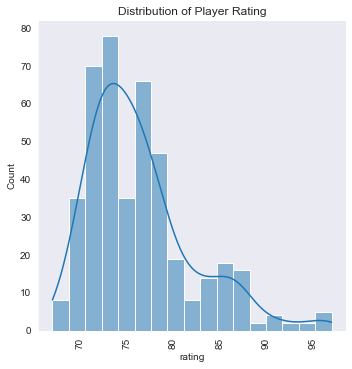

In [241]:
sns.displot(x='rating', data=df, kde=True)
plt.xticks(rotation=90)
plt.title('Distribution of Player Rating')
plt.show()

Lets look at the distribution of player performance as indicated by their rating. At first it may seem like a normal distribution centered around 75, however there is a higher than normal amount of players in the 85+ range. These players tend to get the most play time and are the most consistent. This is a normal occurence in sports where the barrier for entry follows a relatively normal disitribution to enter and perform in the sport, but the top performers are naturally more attracted to enter the big leagues and as such have a slight skew in that direction.

Lets now look at the teams and their breakdowns.

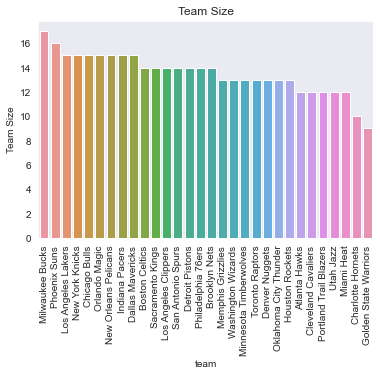

In [248]:
sns.countplot(x='team',data=df, order = df['team'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Team Size')
plt.ylabel('Team Size')
plt.show()

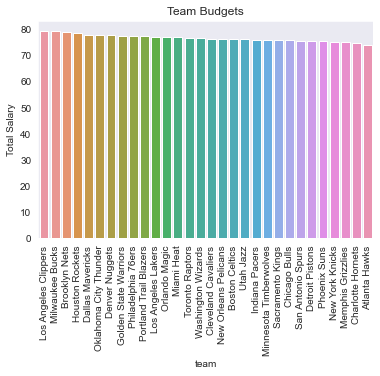

In [249]:
team_budgets = df.groupby('team').sum('salary')['salary'].sort_values(ascending = False)
sns.barplot(x=team_budgets.index,y=avg_rating.values)
plt.xticks(rotation=90)
plt.title('Team Budgets')
plt.ylabel('Total Salary')
plt.show()

Team size distribution is almost the same across the board except for one surprising figure of the Golden State Warriors. They have a signficantly smaller team but have the 8th most money spent on a team. This means that they spent a significant amount of resources to invest in a super team, which showed up when they went on to win the title in 2020. The Milwuake Bucks spent the second most on a team but they also have the most amount of players on their team which explains why the spend is so high, so their average spend per player is brought down. 

Is this money spent worth it?

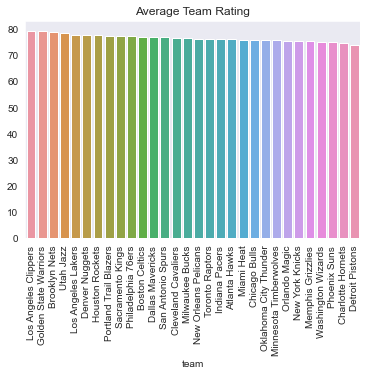

In [250]:
avg_rating = df.groupby('team').mean()['rating'].sort_values(ascending = False)
#avg_rating
#sns.catplot(data=avg_rating, x=avg_rating.index, y=avg_rating.values, kind='bar', estimator=np.mean)
sns.barplot(x=avg_rating.index, y=avg_rating.values)
plt.xticks(rotation=90)
plt.title('Average Team Rating')
plt.show()

The Clippers' spend does seem to be worth it as they have the highest average team rating. Next is the Warriors which makes sense for their strategy of building a super team. We see that overall the trend of higher team budget means higher average team player rating, so that means players are getting rewarded for their performance accordingly. However there is some confounding data bias here, as despite having such large teams, 5 players are on the court at one time, and there are very few swaps made throughout the match. As such, we will only look at the top 7 players for each team and compare the results.

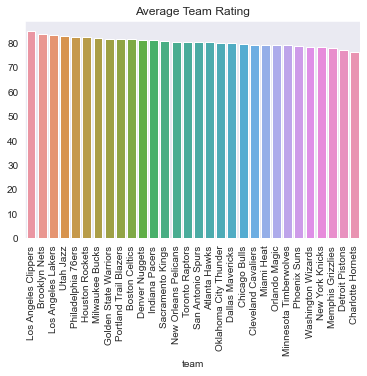

In [251]:
playing_rating = df.groupby('team')['rating'].nlargest(7).groupby('team').mean().sort_values(ascending = False)
#playing_rating
sns.barplot(x=playing_rating.index, y=playing_rating.values)
plt.xticks(rotation=90)
plt.title('Average Team Rating')
plt.show()

In [252]:
avg_rank = avg_rating.rank(ascending=False)
playing_rank = playing_rating.rank(ascending=False)
rank_diff = playing_rank - avg_rank
rank_diff.sort_values()

team
Milwaukee Bucks          -8.0
Indiana Pacers           -6.5
Philadelphia 76ers       -5.0
Oklahoma City Thunder    -4.5
Phoenix Suns             -3.0
Atlanta Hawks            -2.0
Toronto Raptors          -2.0
Los Angeles Lakers       -2.0
Boston Celtics           -1.5
Orlando Magic            -1.5
New Orleans Pelicans     -1.0
Washington Wizards       -1.0
Brooklyn Nets            -1.0
Detroit Pistons          -1.0
Houston Rockets          -1.0
Chicago Bulls            -1.0
Los Angeles Clippers      0.0
Utah Jazz                 0.0
Minnesota Timberwolves    0.5
Charlotte Hornets         1.0
Portland Trail Blazers    1.5
San Antonio Spurs         2.0
Memphis Grizzlies         2.0
New York Knicks           2.5
Miami Heat                3.0
Sacramento Kings          4.0
Denver Nuggets            5.5
Golden State Warriors     6.0
Cleveland Cavaliers       7.0
Dallas Mavericks          7.0
Name: rating, dtype: float64

We see huge movements in the rankings now. The Bucks drop 8 ranks, the Pacers down 6.5, and the 76ers down 5. Meanwhile the Mavs and Cavs go up 7, and the Warriors jump up 6 ranks. This means that the Bucks, Pacers, and 76ers have developed a signficant bench roster, as compared to the Mavs, Cavs, and Warriors which spent a signficant amount more resources on their starting lineup. Obviously for the Warriors this strategy worked amazingly, but the Bucks and Pacers still went on to perform well in the playoffs.

Now we want to look into the investment and performance of USA vs Non-USA players.

In [253]:
usa_df = df[df.country == 'USA']
nonusa_df = df[df.country != 'USA']

top_usa_df = usa_df.groupby('position').head(1)
top_nonusa_df = nonusa_df.groupby('position').head(1)

In [262]:
usa_df['rating'].mean()-nonusa_df['rating'].mean()

-0.5320988375489151

In [263]:
usa_df['salary'].mean()-nonusa_df['salary'].mean()

-255844.81035691313

In [254]:
top_usa_df['rating'].mean()-top_nonusa_df['rating'].mean()

-0.1666666666666572

In [255]:
top_usa_df['salary'].mean()-top_nonusa_df['salary'].mean()

4530721.166666668

In [258]:
top_usa_df.describe()

,rating,jersey,height,weight,salary,draft_year,age
count,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000
mean,89.666667,8.666667,79.833333,230.833333,2.493231e+07,2009.666667,32.000000
std,7.339391,8.547904,2.136976,24.449267,1.334834e+07,3.983298,3.794733
min,78.000000,0.000000,77.000000,203.000000,3.500000e+06,2003.000000,27.000000
25%,86.250000,3.000000,78.250000,220.000000,1.849200e+07,2009.000000,29.750000
50%,90.500000,6.500000,80.000000,221.000000,2.741650e+07,2009.500000,32.500000
75%,95.500000,12.250000,81.750000,243.000000,3.501264e+07,2011.500000,33.000000
max,97.000000,23.000000,82.000000,270.000000,3.819900e+07,2015.000000,38.000000


In [260]:
top_nonusa_df.describe()

,rating,jersey,height,weight,salary,draft_year,age
count,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000
mean,89.833333,32.000000,81.333333,224.333333,2.040159e+07,2014.500000,27.333333
std,3.600926,26.030751,4.501851,24.369380,1.219502e+07,2.428992,2.338090
min,87.000000,6.000000,74.000000,180.000000,2.351838e+06,2011.000000,23.000000
25%,87.000000,13.500000,79.500000,221.750000,1.222319e+07,2013.250000,27.250000
50%,89.000000,27.500000,82.000000,227.000000,2.656385e+07,2014.500000,28.000000
75%,91.000000,40.750000,83.750000,238.250000,2.744972e+07,2015.750000,28.000000
max,96.000000,77.000000,87.000000,250.000000,3.174200e+07,2018.000000,30.000000


Here we compare the performance and salaries of US natives and Non-USA natives and find quite a confusing result. So overall in the league, we find that performance is a pretty good indicator for the individual's salary and that it follows a positive correlation. We see that on average, the Non-USA players are about half a point better than the USA players, which is makes a little sense as it takes a lot more time and resources and effort to bring such an individual into the USA. This 1/2 point though is not demonstrably ahead that it has signficant impact on whether more scouting should be emphasized on out of the US talent scouting. To go along with that narrative, we see that these players are also paid a slight amount more on average than their USA counter parts, because they have a slightly better performance, and we have found that performance and salary are positively correlated. This is not the surprise.


The surprise comes when we start looking into the specifics. We see that the average rating among the top players for USA and Non-USA  is basically negligble, and if anything slightly in the Non-USA players' favor (by 0.16). So for sake of argument we will say that there is no difference in performance, which makes sense for the narrative. The top will be the top. However, we see that their salary is actually about 500k more for the USA native top players than for the Non-USA players. Taking a deeper dive into the data, we see that it is two players in particular for the Non-USA that brings the average down quite a signficant amount: Doncic and Siakam. But why is that the case?

Looking more into it, we see that Doncic and Siakam are some of the newest drafted out of the best players, and despite having amazing performance and ratings, their contracts were likely created close to when they were first drafted and have not had the time or opportunity to renegotiate and size up their offers, making them quite the steal for their price as being at the top of their game for low prices.

## Just Some Other Graphs I Was Playing Around With to Figure Out Narrative

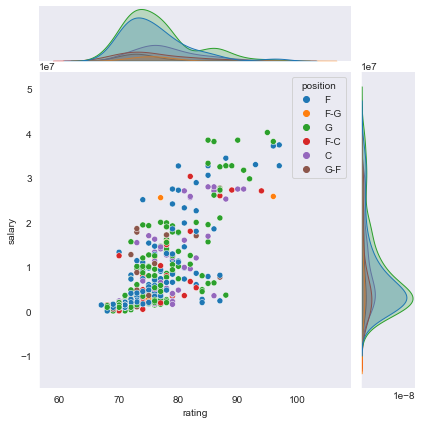

In [264]:
sns.jointplot(data=df,x='rating',y='salary',hue='position')

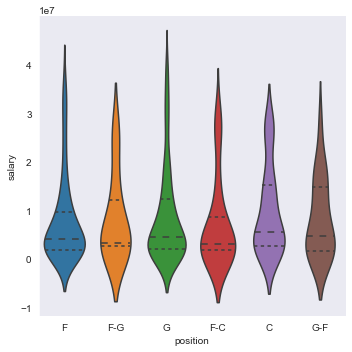

In [265]:
sns.catplot(data=df, x='position',y='salary',kind='violin',split=True, inner = 'quart')

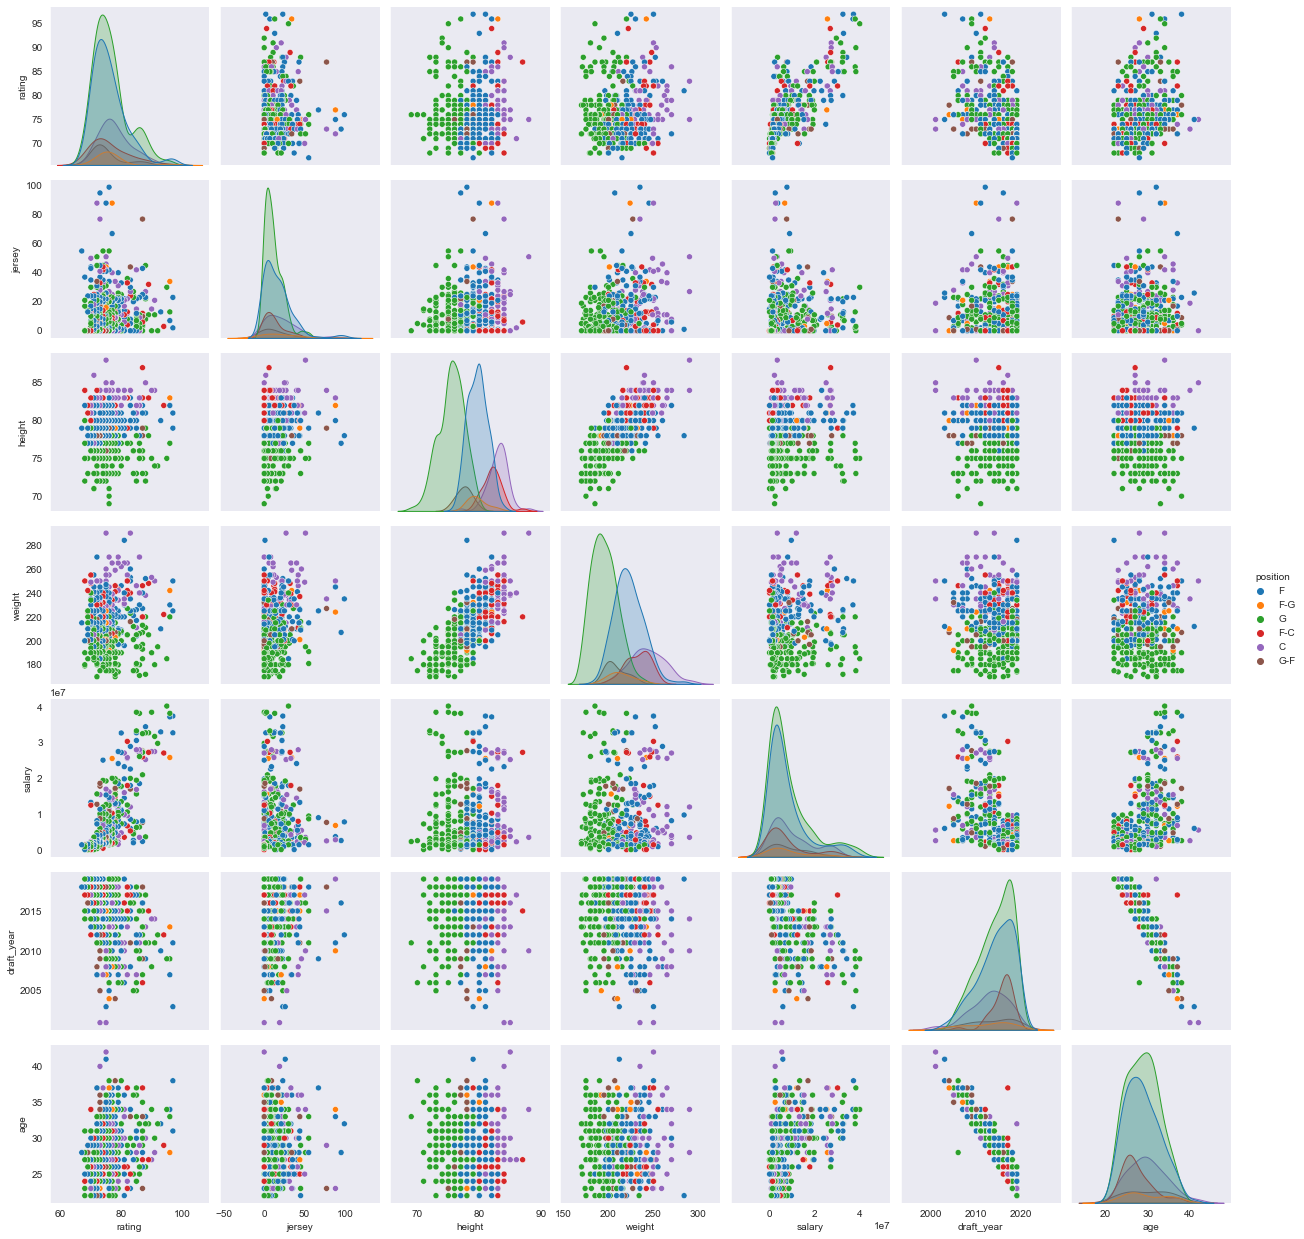

In [219]:
sns.pairplot(data=df,hue='position')